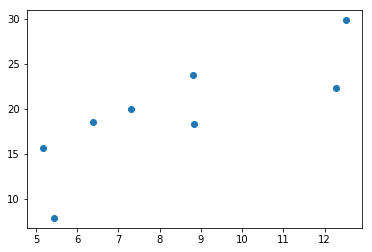

In [1]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display
import numpy as np
# 设置随机数种子，保证在不同电脑上运行时下面的输出一致
t.manual_seed(1000) 

def get_fake_data(batch_size=8):
    ''' 产生随机数据：y=x*2+3，加上了一些噪声'''
    x = t.rand(batch_size, 1) * 20
    y = x * 2 + (1 + t.randn(batch_size, 1))*3
    return x, y

# 来看看产生的x-y分布
x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

In [2]:
w = t.rand(1,1)
b = t.zeros(1,1)  
lr = 0.001


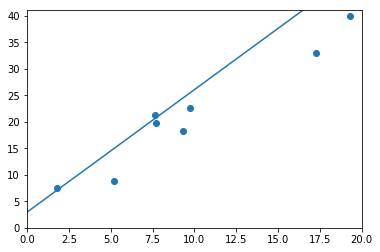

1.8912267684936523 2.970240592956543


In [4]:
import logging
logging.basicConfig(
    level=logging.DEBUG,
    format="[%(asctime)s] %(name)s:%(levelname)s: %(message)s")

for i in range(20000):
    x,y=get_fake_data()
    output = w*x+b
    loss = t.sum(0.5*(output-y)**2)
    do = output-y
    dw = x.t().mm(do)
    #dw = do.dot(x)
    #logging.debug(dw.size())
    db = t.sum(do)
    w = w - lr*dw
    b = b - lr*db
    
    if i%1000 == 0:
        display.clear_output(wait=True)
        x = t.arange(0,20).view(-1,1)
        yhat = w * x + b
        #y = w*x+b
        plt.plot(x.numpy(),yhat.numpy())
        
        x2,y2 = get_fake_data()
        plt.scatter(x2.numpy(),y2.numpy())
        
        plt.xlim(0, 20)
        plt.ylim(0, 41)
        
        
        plt.pause(0.5)
        
        plt.show()
print(w.squeeze()[0], b.squeeze()[0])

torch.Size([2])